In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv("India GDP 1960-2022.csv")
df.head(15)

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%
5,4.0,2017,"$2,651.47B","$1,981",6.80%
6,5.0,2016,"$2,294.80B","$1,733",8.26%
7,6.0,2015,"$2,103.59B","$1,606",8.00%
8,7.0,2014,"$2,039.13B","$1,574",7.41%
9,8.0,2013,"$1,856.72B","$1,450",6.39%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


In [4]:
df.rename(columns = {'India GDP - Historical Data':'year'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.1':'GDP$'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.2':'Per_capita$'}, inplace = True)
df.rename(columns = {'India GDP - Historical Data.3':'Growth%'}, inplace = True)
df

,Unnamed: 0,year,GDP$,Per_capita$,Growth%
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%
...,...,...,...,...,...
58,57.0,1964,$56.48B,$116,7.45%
59,58.0,1963,$48.42B,$101,5.99%
60,59.0,1962,$42.16B,$90,2.93%
61,60.0,1961,$39.23B,$85,3.72%


In [5]:
df = df.iloc[1: , :]

In [6]:
df.reset_index(inplace = True)
df

,index,Unnamed: 0,year,GDP$,Per_capita$,Growth%
0,1,0.0,2021,"$3,173.40B","$2,277",8.95%
1,2,1.0,2020,"$2,667.69B","$1,933",-6.60%
2,3,2.0,2019,"$2,831.55B","$2,072",3.74%
3,4,3.0,2018,"$2,702.93B","$1,998",6.45%
4,5,4.0,2017,"$2,651.47B","$1,981",6.80%
...,...,...,...,...,...,...
57,58,57.0,1964,$56.48B,$116,7.45%
58,59,58.0,1963,$48.42B,$101,5.99%
59,60,59.0,1962,$42.16B,$90,2.93%
60,61,60.0,1961,$39.23B,$85,3.72%


In [7]:
df['GDP$'] = df['GDP$'].str.replace('$', '')
df['GDP$'] = df['GDP$'].str.replace('B', '')
df['GDP$'] = df['GDP$'].str.replace(',', '')
df['Per_capita$'] = df['Per_capita$'].str.replace('$', '')
df['Per_capita$'] = df['Per_capita$'].str.replace(',', '')
df['Growth%'] = df['Growth%'].str.replace('%', '')

df

,index,Unnamed: 0,year,GDP$,Per_capita$,Growth%
0,1,0.0,2021,3173.40,2277,8.95
1,2,1.0,2020,2667.69,1933,-6.60
2,3,2.0,2019,2831.55,2072,3.74
3,4,3.0,2018,2702.93,1998,6.45
4,5,4.0,2017,2651.47,1981,6.80
...,...,...,...,...,...,...
57,58,57.0,1964,56.48,116,7.45
58,59,58.0,1963,48.42,101,5.99
59,60,59.0,1962,42.16,90,2.93
60,61,60.0,1961,39.23,85,3.72


In [10]:
df['Growth%'][61]

''

In [12]:
freq_Growth=df['Growth%'].mode()[0]

In [13]:
df['Growth%'][61] = freq_Growth
df['Growth%'][61]

'7.86'

In [14]:
df['GDP$'] = df['GDP$'].astype(float)
df['Per_capita$'] = df['Per_capita$'].astype(float)
df['Growth%'] = df['Growth%'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        62 non-null     int64  
 1   Unnamed: 0   62 non-null     float64
 2   year         62 non-null     object 
 3   GDP$         62 non-null     float64
 4   Per_capita$  62 non-null     float64
 5   Growth%      62 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


<AxesSubplot:xlabel='year', ylabel='Growth%'>

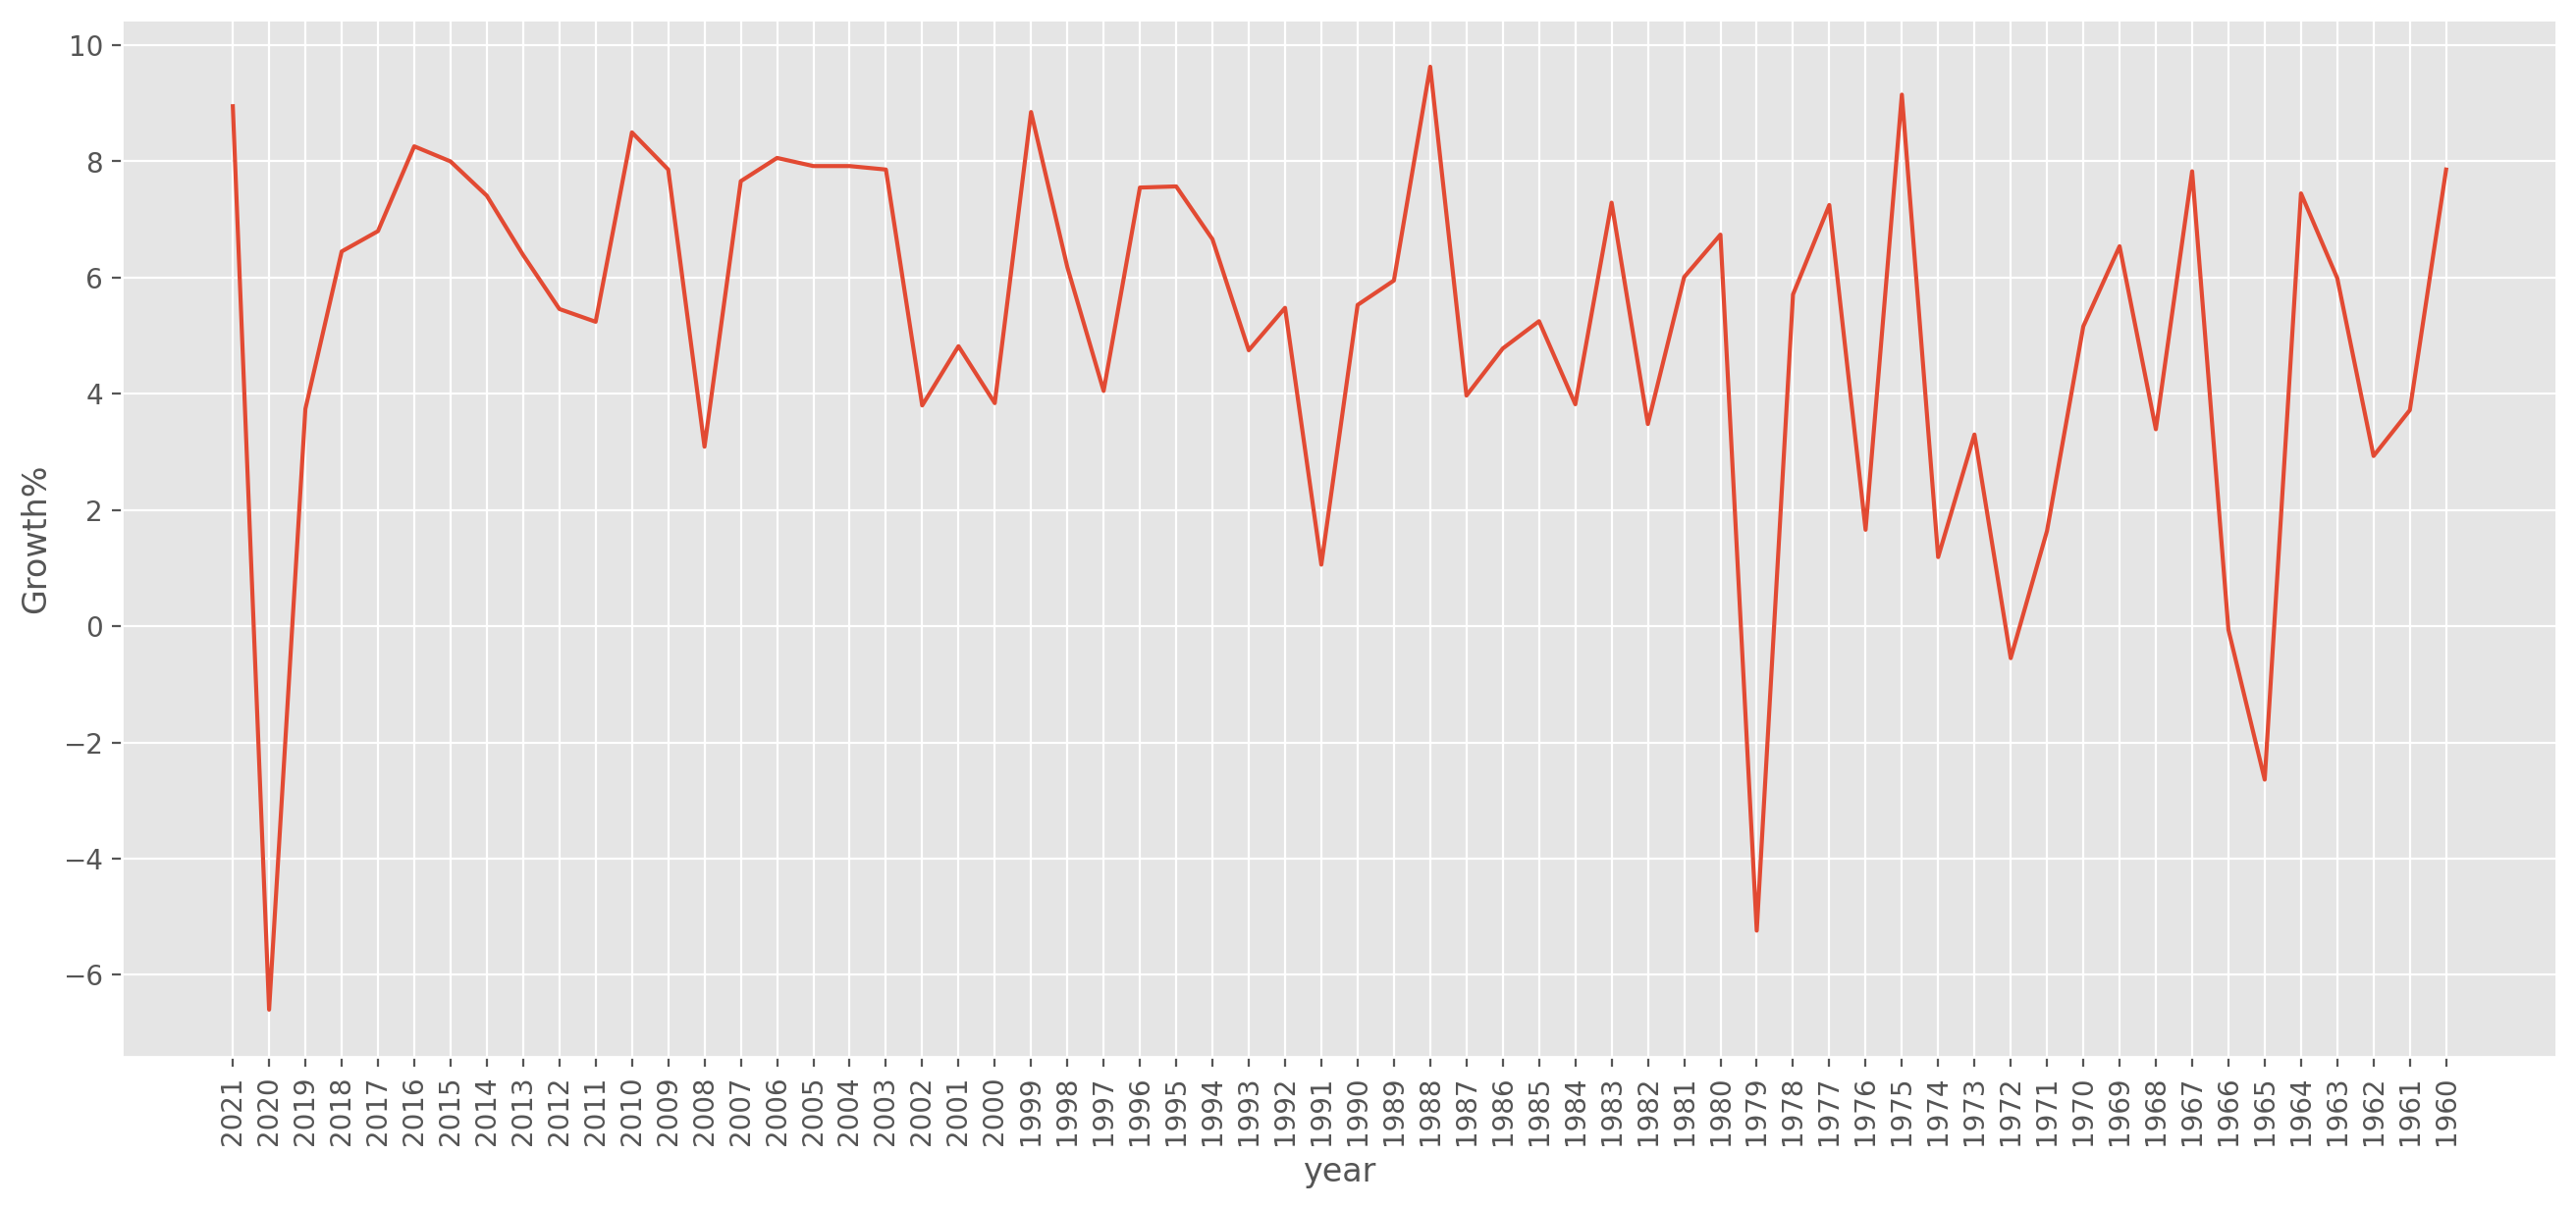

In [16]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['Growth%'], x = df.year)

<AxesSubplot:xlabel='year', ylabel='GDP$'>

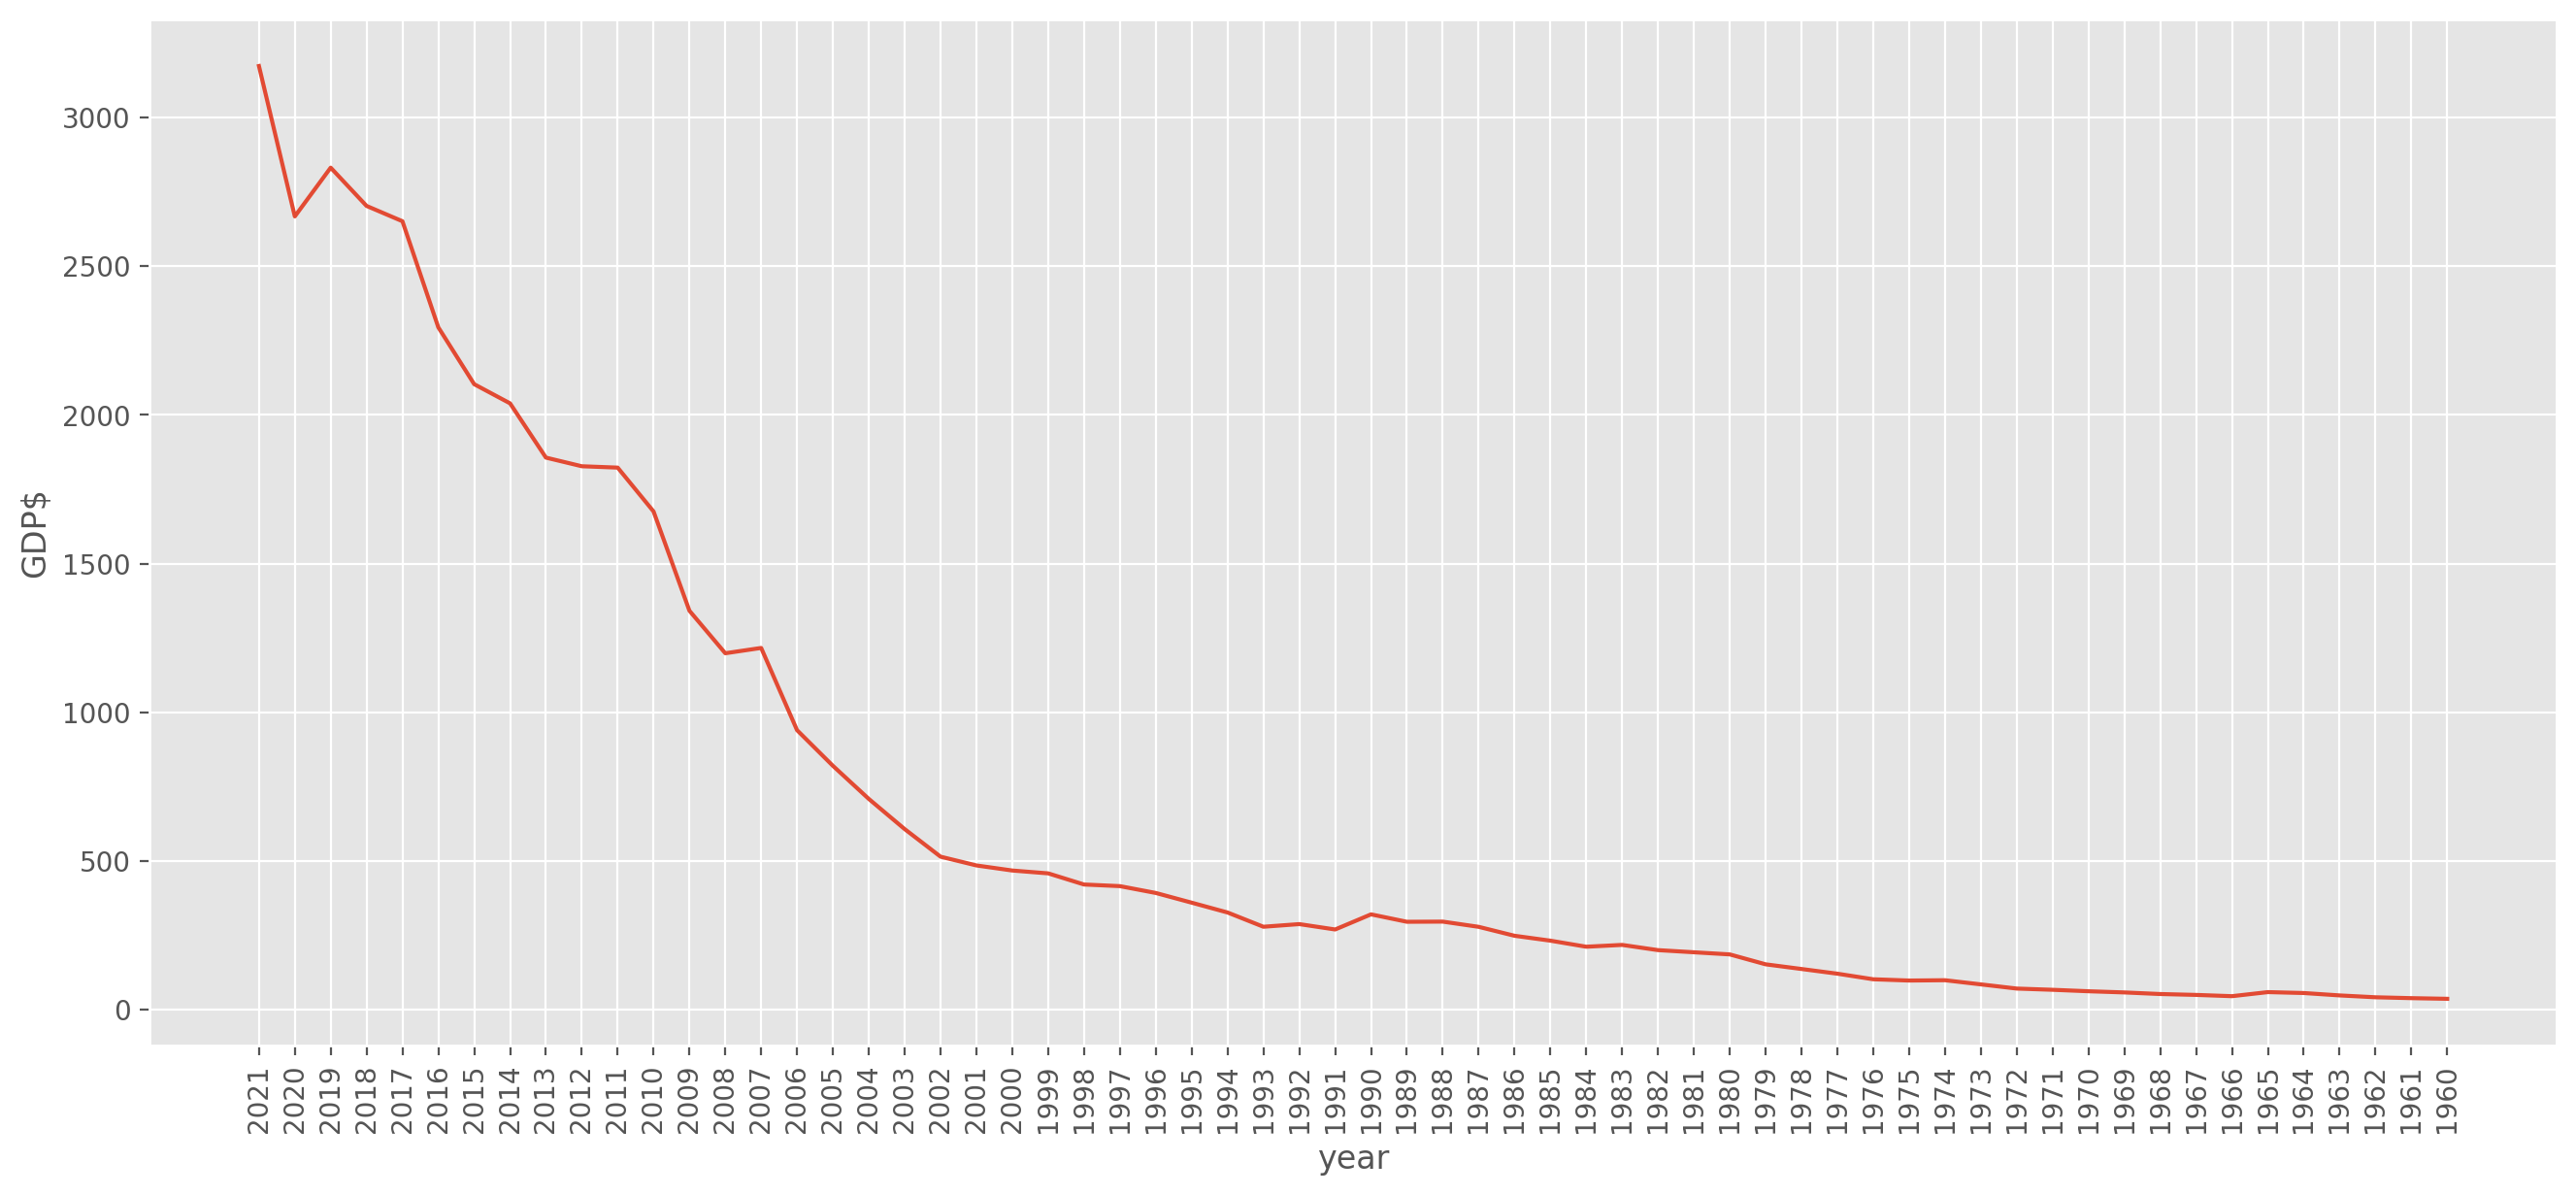

In [17]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['GDP$'], x = df.year)

<AxesSubplot:ylabel='Frequency'>

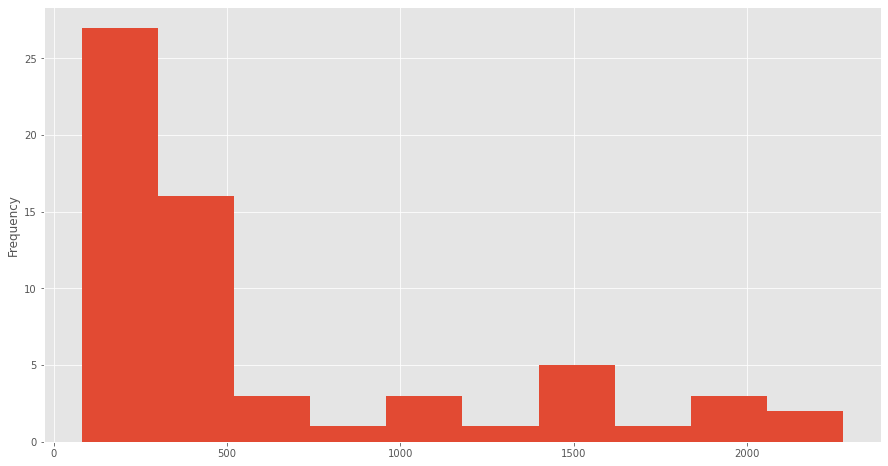

In [18]:
df["Per_capita$"].plot(kind="hist",figsize=(15,8))

In [19]:
df

,index,Unnamed: 0,year,GDP$,Per_capita$,Growth%
0,1,0.0,2021,3173.40,2277.0,8.95
1,2,1.0,2020,2667.69,1933.0,-6.60
2,3,2.0,2019,2831.55,2072.0,3.74
3,4,3.0,2018,2702.93,1998.0,6.45
4,5,4.0,2017,2651.47,1981.0,6.80
...,...,...,...,...,...,...
57,58,57.0,1964,56.48,116.0,7.45
58,59,58.0,1963,48.42,101.0,5.99
59,60,59.0,1962,42.16,90.0,2.93
60,61,60.0,1961,39.23,85.0,3.72


In [20]:
cols_to_scale = ['GDP$', 'Growth%']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

In [21]:
df

,index,Unnamed: 0,year,GDP$,Per_capita$,Growth%
0,1,0.0,2021,2.876478,2277.0,1.174818
1,2,1.0,2020,2.288584,1933.0,-3.612543
2,3,2.0,2019,2.479074,2072.0,-0.429179
3,4,3.0,2018,2.329551,1998.0,0.405145
4,5,4.0,2017,2.269728,1981.0,0.512900
...,...,...,...,...,...,...
57,58,57.0,1964,-0.746980,116.0,0.713014
58,59,58.0,1963,-0.756350,101.0,0.263526
59,60,59.0,1962,-0.763627,90.0,-0.678553
60,61,60.0,1961,-0.767033,85.0,-0.435337


In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["year"]])
df[["year"]] = enc.transform(df[["year"]])

<AxesSubplot:>

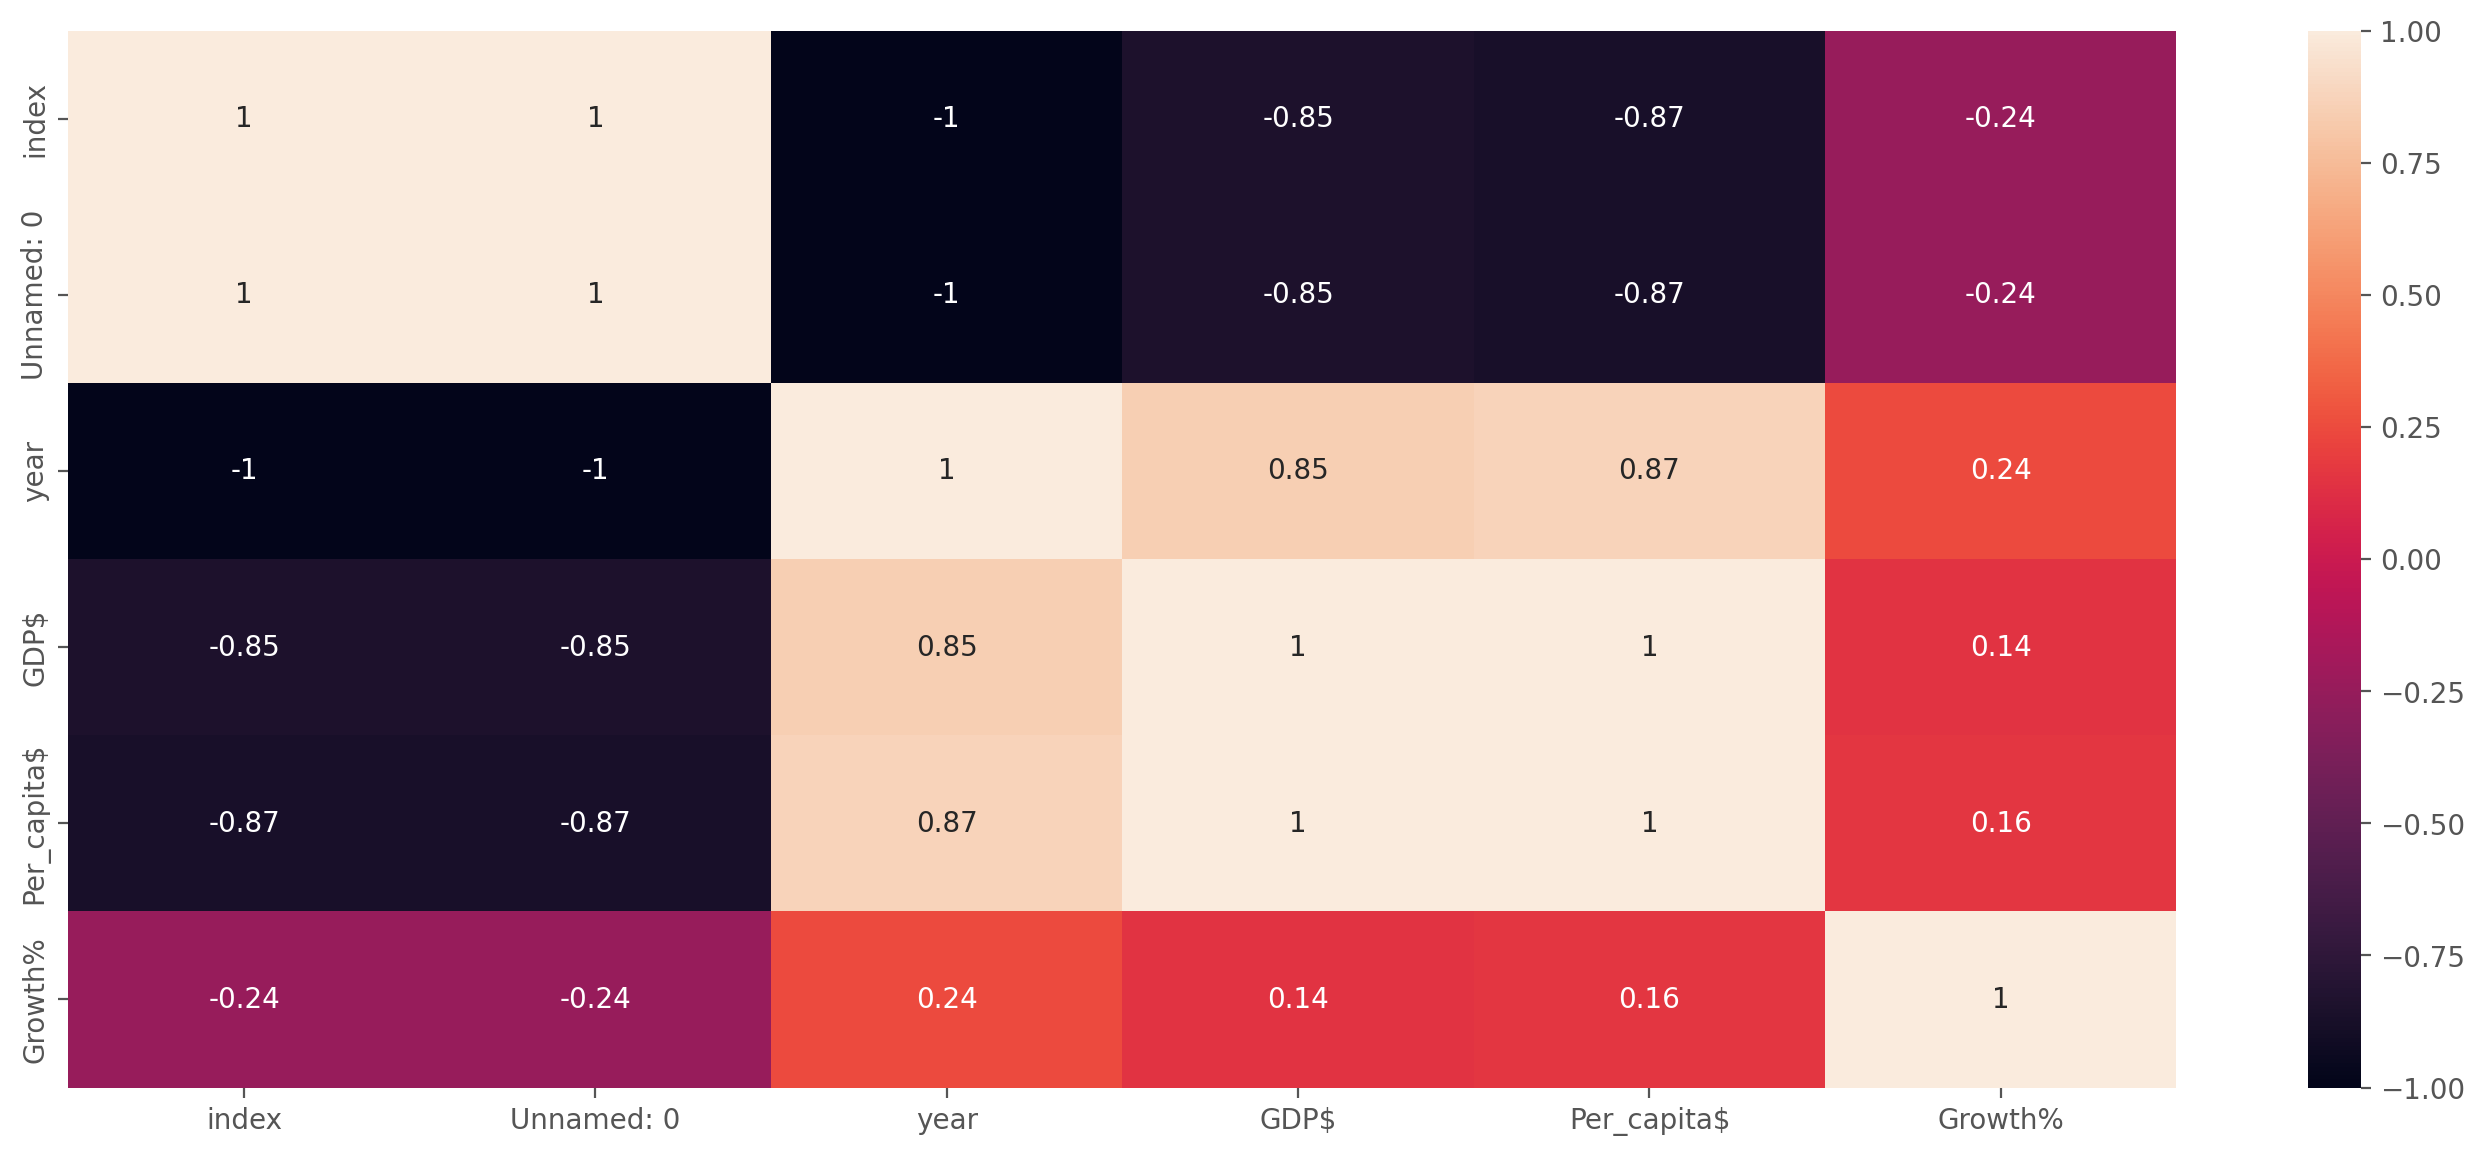

In [23]:
plt.figure(figsize = (17,7), dpi=200)
sns.heatmap(df.corr(), annot = True)

In [24]:
X = df[['year', 'Growth%']]
X

,year,Growth%
0,61.0,1.174818
1,60.0,-3.612543
2,59.0,-0.429179
3,58.0,0.405145
4,57.0,0.512900
...,...,...
57,4.0,0.713014
58,3.0,0.263526
59,2.0,-0.678553
60,1.0,-0.435337


In [25]:
Y = df[['GDP$']]
Y

,GDP$
0,2.876478
1,2.288584
2,2.479074
3,2.329551
4,2.269728
...,...
57,-0.746980
58,-0.756350
59,-0.763627
60,-0.767033


In [26]:
X = X[['year', 'Growth%']].values
Y = Y[['GDP$']].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# Using KNN Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()#(n_neighbors = 5)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [29]:
print('Training Set Score : ', knn_reg.score(x_train, y_train))
print('Testing Set Score  : ', knn_reg.score(x_test, y_test))

Training Set Score :  0.9720196452628772
Testing Set Score  :  0.9843796882861685


# Select Best Value for K

In [30]:
acc_train = []
acc_test  = []

for i in range(1,21):
    regressor = KNeighborsRegressor(n_neighbors = i)
    regressor.fit(x_train, y_train)
    
    acc_train.append(regressor.score(x_train, y_train))
    acc_test.append(regressor.score(x_test, y_test))

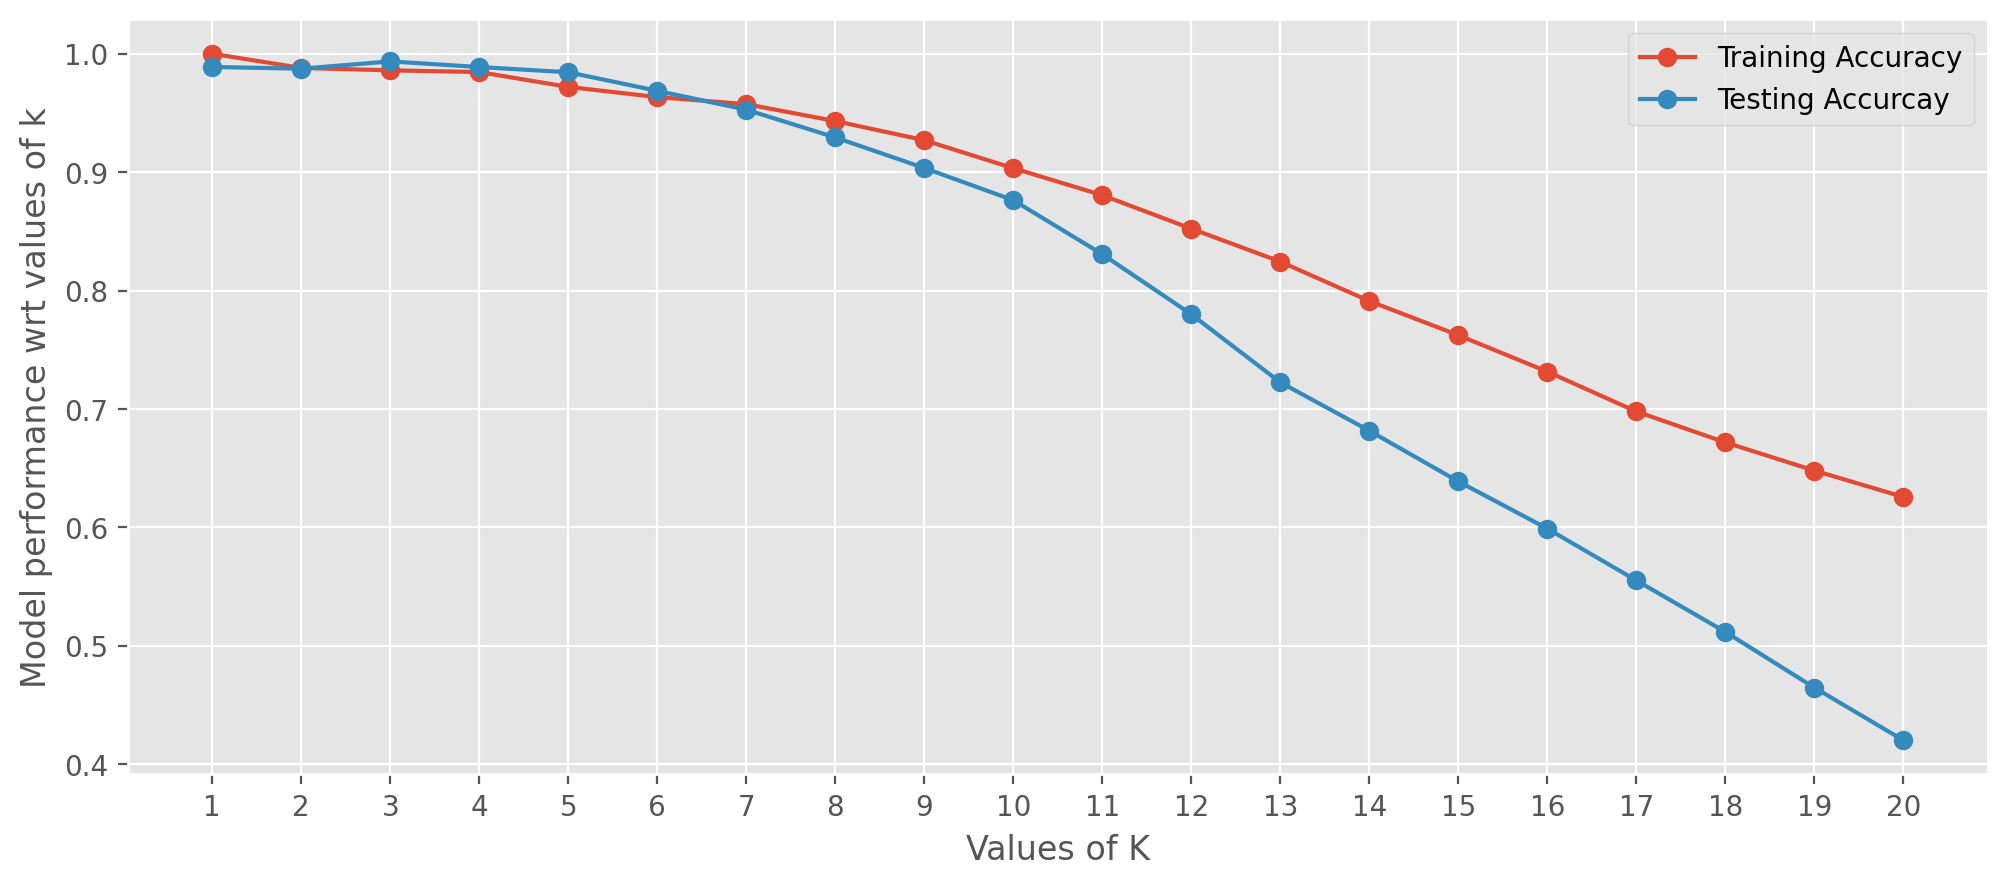

In [31]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [34]:
regressor = KNeighborsRegressor(n_neighbors = 3)
regressor.fit(x_train, y_train)

print('Training Set Accuracy : ', regressor.score(x_train, y_train))
print('Testing Set Accuracy  : ', regressor.score(x_test, y_test))

Training Set Accuracy :  0.9860061722151046
Testing Set Accuracy  :  0.9935325455822633
